### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-31,481486,5436594,825549,619334,299428,149096,137402,302671,124729,112111,89405,129942,131606,4849,202653
2022-01-01,481770,5440581,825816,619367,299428,149251,137513,303496,124839,112157,89405,129986,131639,4849,202690
2022-01-02,481893,5443698,826060,619401,299525,149324,137646,304284,124930,112161,89405,130026,131680,4849,202741
2022-01-03,482017,5449623,827748,619473,299581,149367,137786,305096,125200,112584,89573,130061,131702,4849,202818
2022-01-04,482017,5456940,830132,619654,299581,149417,138045,305906,125551,112929,89689,130100,131736,4849,202867


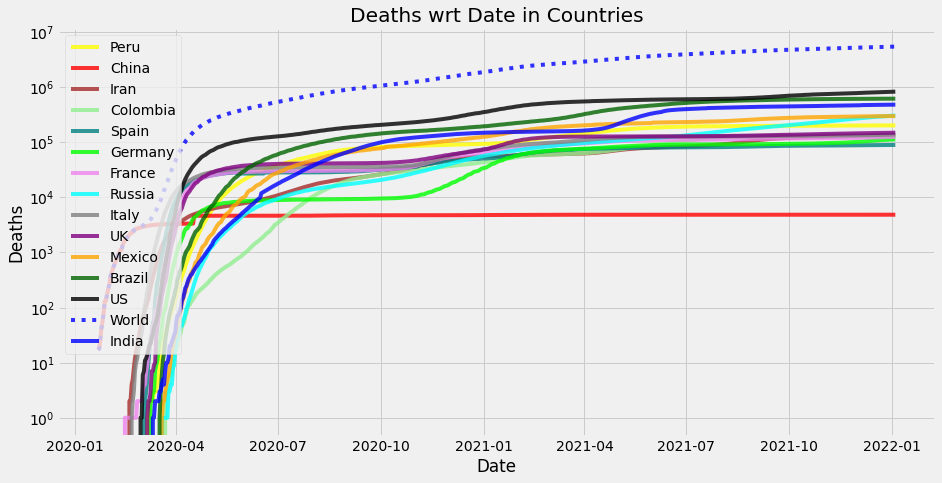

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-31,22775,1690794,472486,10190,18061,190871,144255,20482,232200,21764,0,10401,1703,248,0
2022-01-01,27553,1115442,115984,3782,0,162972,141256,19606,219126,2968,0,12415,1002,209,4577
2022-01-02,33750,877670,248632,1806,9193,135123,61137,18088,58432,12636,0,11318,1510,158,4346
2022-01-03,37379,2435881,1082549,11654,4548,187864,68034,16193,67489,50013,372766,9848,1677,188,3497
2022-01-04,0,2536771,869187,19171,0,225760,170837,15760,271974,61905,117775,12353,1706,104,5182


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-31,9675,943403,245822,6665,3677,105773,46850,26444,89709,36927,47171,3567,2640,138,2026
2022-01-01,10866,954872,237166,6473,3432,109587,53144,25988,98336,34663,44026,4157,2531,143,2196
2022-01-02,12392,949725,237931,6162,3816,111289,53677,25461,95676,33195,41091,4634,2463,144,2340
2022-01-03,14058,1048802,294239,6528,3865,116394,54634,24843,93797,34316,63203,4982,2410,147,2417
2022-01-04,13121,1148000,332568,7371,3607,123685,62381,24238,105675,36155,66841,5473,2363,144,2601


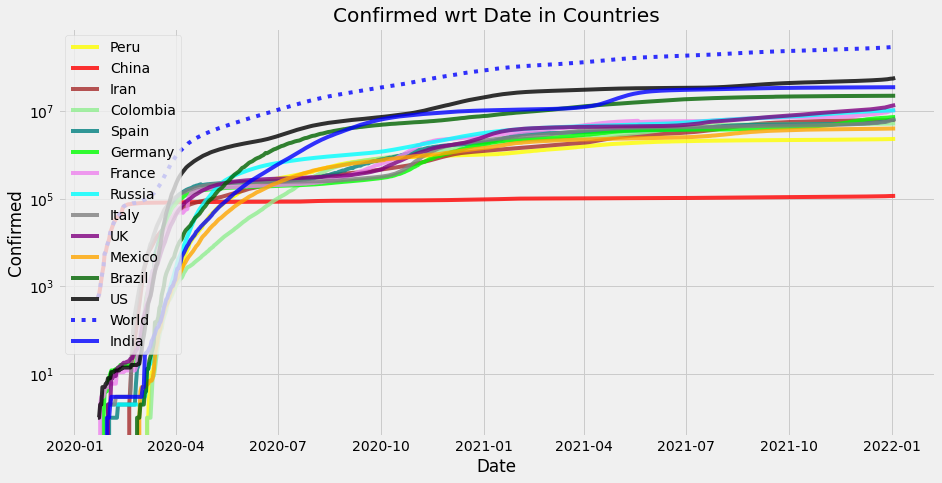

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-31,406,6383,581,85,296,203,155,880,189,182,0,41,34,0,0
2022-01-01,284,3987,267,33,0,155,111,825,110,46,0,44,33,0,37
2022-01-02,123,3117,244,34,97,73,133,788,91,4,0,40,41,0,51
2022-01-03,124,5925,1688,72,56,43,140,812,270,423,168,35,22,0,77
2022-01-04,0,7317,2384,181,0,50,259,810,351,345,116,39,34,0,49


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-31,321.14,6698.59,1357.48,117.36,153.43,129.10,139.17,962.25,176.24,304.91,51.57,41.12,46.83,0.0,40.00
2022-01-01,316.50,6359.64,1221.17,106.81,134.26,132.34,135.65,945.10,167.96,272.55,45.12,41.48,45.10,0.0,39.63
2022-01-02,292.31,5954.31,1099.03,97.71,129.60,124.92,135.32,925.46,158.34,238.98,39.48,41.30,44.59,0.0,41.05
2022-01-03,271.27,5950.65,1172.65,94.50,120.40,114.68,135.90,911.28,172.29,261.98,55.55,40.51,41.77,0.0,45.54
2022-01-04,237.36,6121.44,1324.07,105.31,105.35,106.60,151.29,898.62,194.63,272.36,63.10,40.32,40.79,0.0,45.98


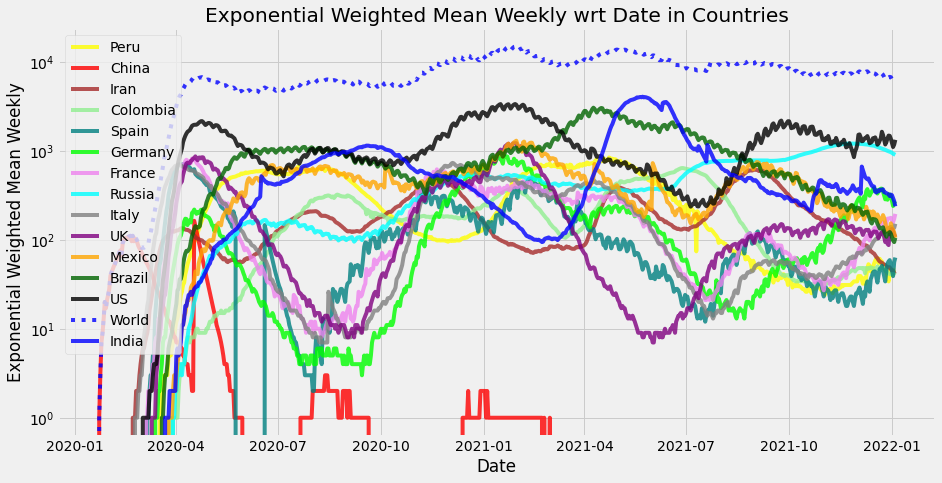

In [18]:
plotter(np.round(AVG), name)

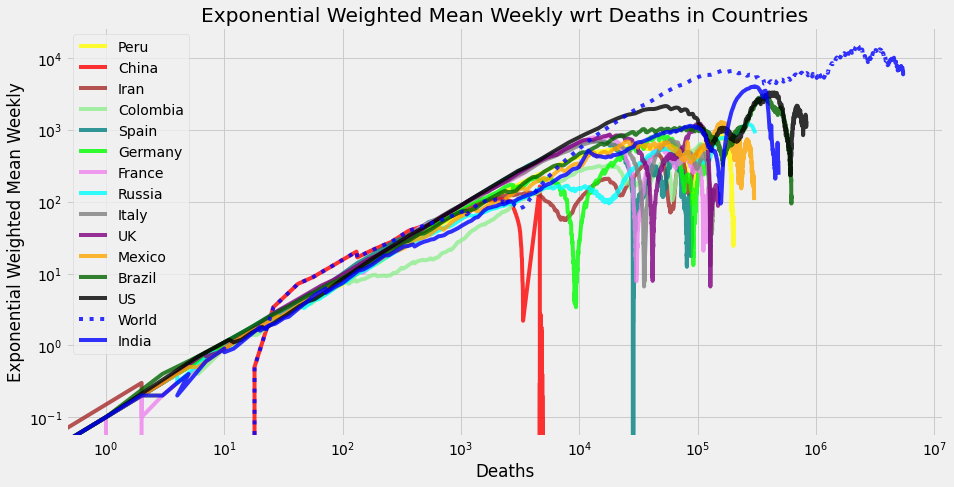

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

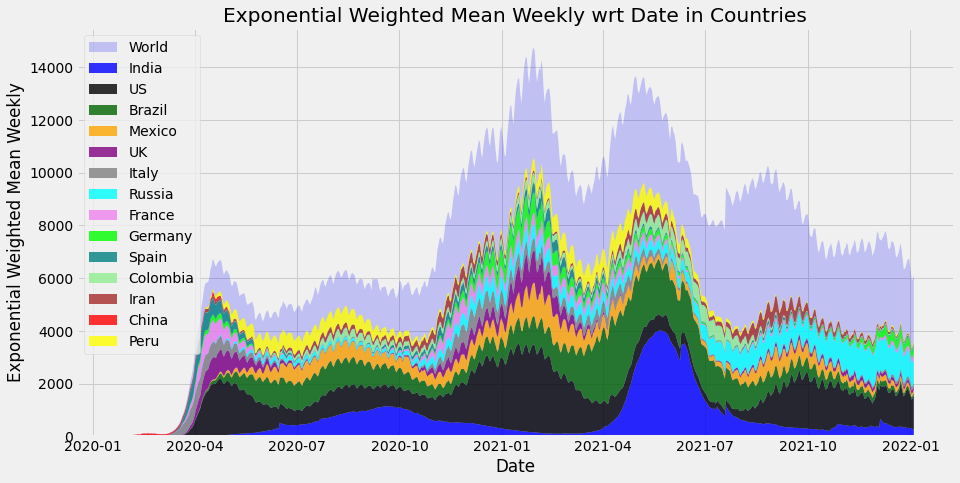

In [20]:
stackplotter(AVG, name)

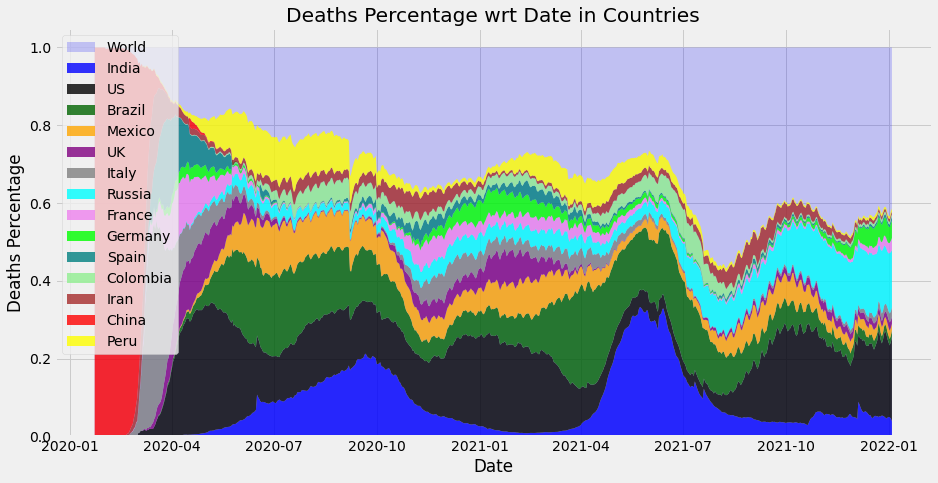

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

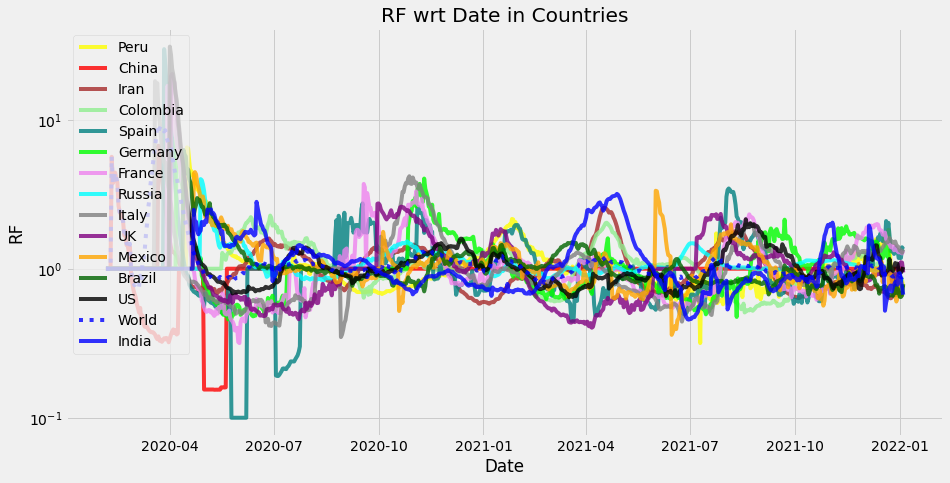

In [23]:
plotter(Reproductivity, 'RF')

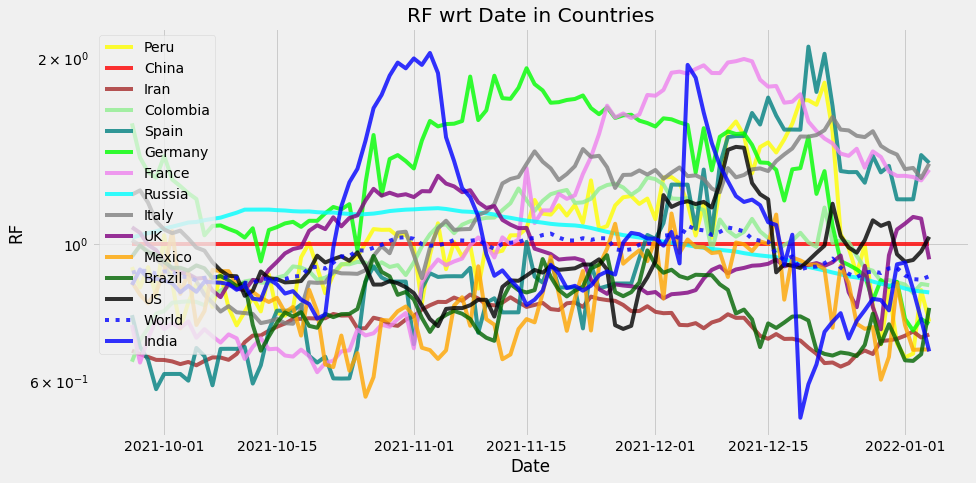

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

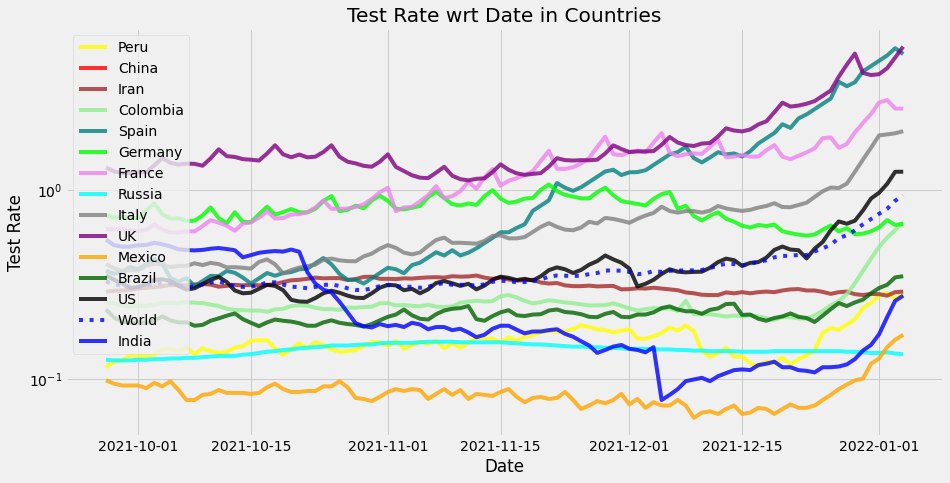

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

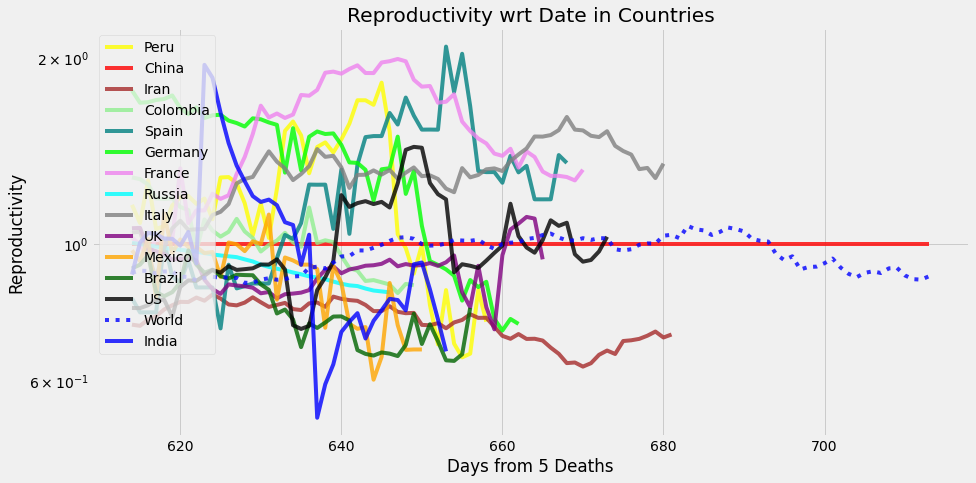

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

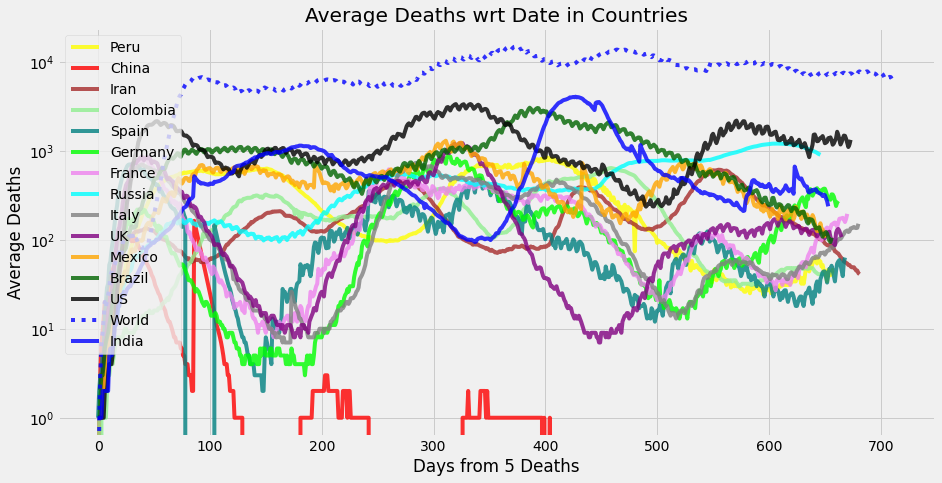

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

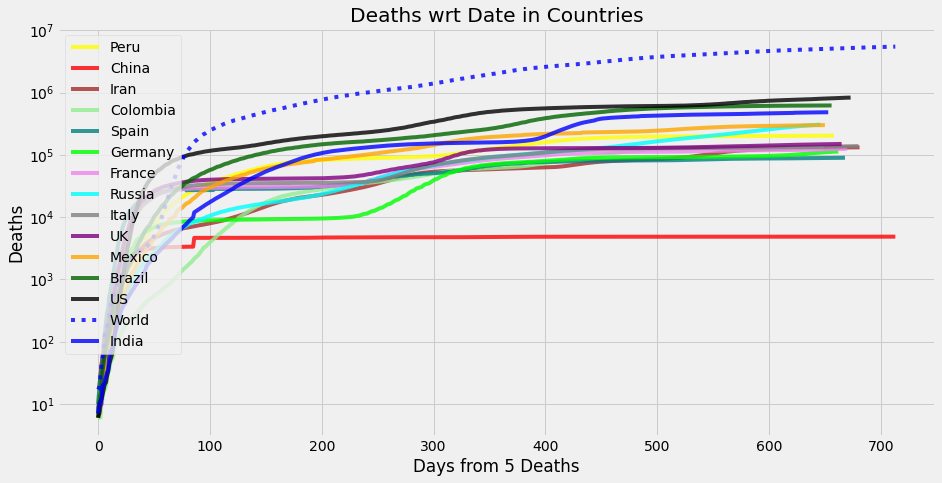

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5456940,7317,6008.57,6121.44,0.8864,295160070,0.938,1148000,1091.39
US,830132,2384,1251.00,1324.07,1.0269,57058734,1.256,332568,166.03
Brazil,619654,181,96.57,105.31,0.7875,22328252,0.350,7371,123.93
India,482017,0,203.57,237.36,0.6695,34960261,0.276,13121,96.40
Russia,305906,810,846.14,898.62,0.8344,10390052,0.135,24238,61.18
Mexico,299581,0,108.86,105.35,0.6743,3993464,0.171,3607,59.92
Peru,202867,49,49.00,45.98,0.7480,2309856,0.283,2601,40.57
UK,149417,50,132.71,106.60,0.9439,13723275,5.801,123685,29.88
Indonesia,144105,3,4.86,5.68,1.0000,4263732,NaN,234,28.82


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5456940,7317,6008.57,6121.44,0.8864,295160070,0.938,1148000,1091.39
US,830132,2384,1251.00,1324.07,1.0269,57058734,1.256,332568,166.03
Russia,305906,810,846.14,898.62,0.8344,10390052,0.135,24238,61.18
Poland,98034,433,445.71,383.48,1.0128,4145518,0.185,14206,19.61
Germany,112929,345,276.43,272.36,0.7418,7320708,0.664,36155,22.59
Vietnam,33245,224,230.43,225.98,0.9792,1800704,0.356,16068,6.65
Ukraine,102717,159,215.00,227.74,0.6442,3858248,0.141,6409,20.54
India,482017,0,203.57,237.36,0.6695,34960261,0.276,13121,96.40
France,125551,351,196.71,194.63,1.3187,10694804,2.715,105675,25.11


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5456940


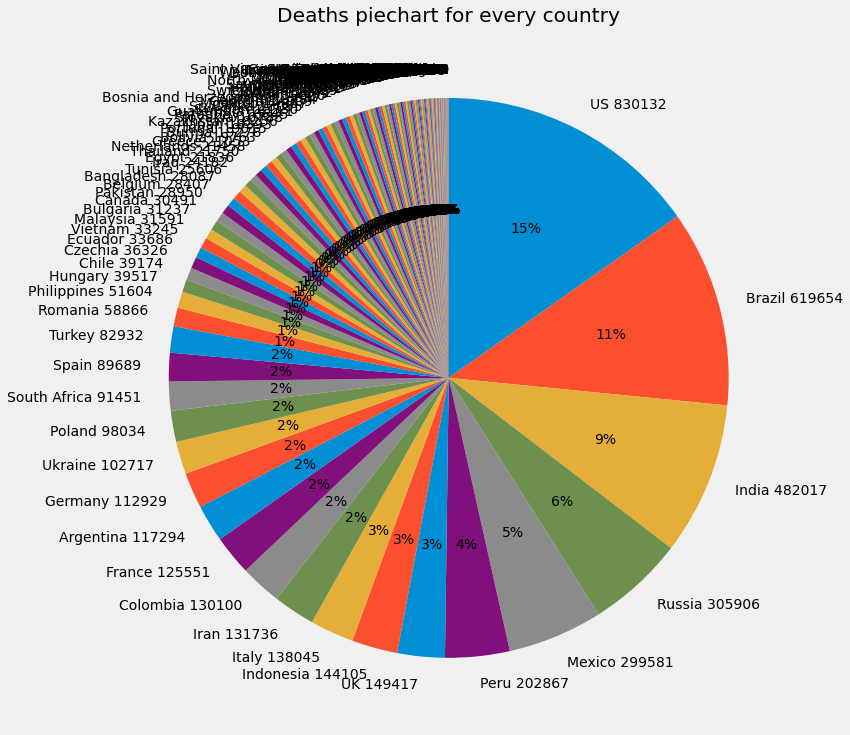

In [35]:
piechart('Deaths')

World total:  6008


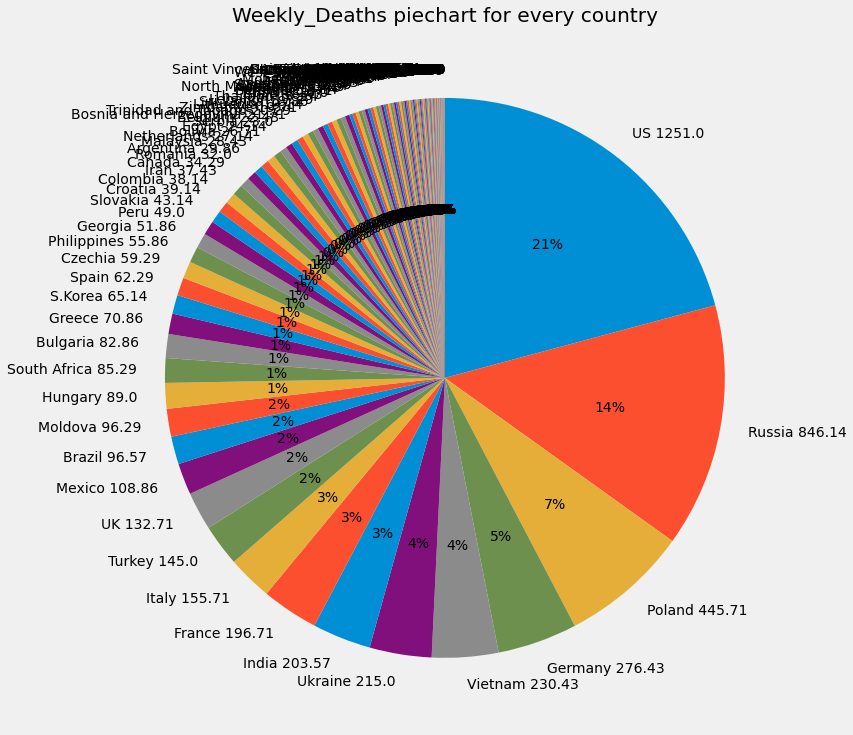

In [36]:
piechart('Weekly_Deaths')

World total:  7317


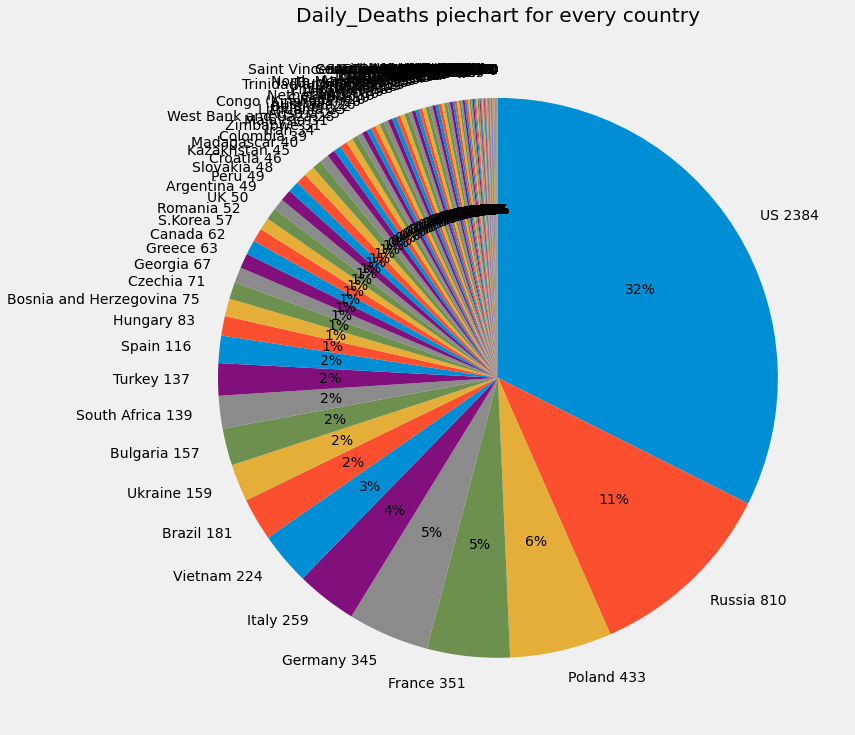

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2022-01-05


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1091388000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 71c490d] `date` update
 1 file changed, 2125 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   24dbaf3..71c490d  master -> master
